<a href="https://colab.research.google.com/github/Mahnoor-14/MachineLearningAlgorithm/blob/main/ML_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Preprocessing

In [5]:
data = pd.read_csv('/content/drive/MyDrive/ATom/ML_project1/Social_Network_Ads.csv')

In [6]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
data.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


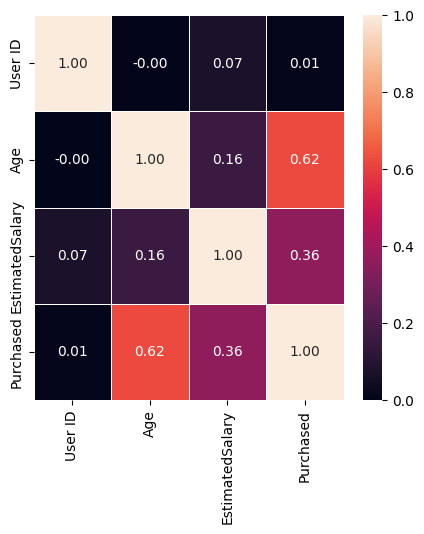

In [9]:


import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr(numeric_only=True)

plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

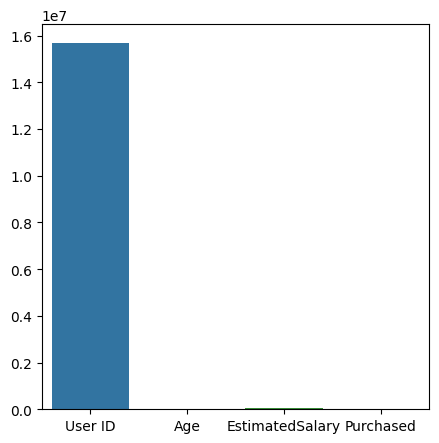

In [10]:
plt.figure(figsize=(5,5))
sns.barplot(data=data)
plt.show()

In [11]:
data.drop('User ID', axis=1, inplace=True)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### Encoding Gender column


In [12]:
#using label enncoding technique

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
print(data.head())

   Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0


### *Ecdoding Target Variable*

In [13]:
#encoding
data['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


hence it is already encoded

### standarized feature column

In [14]:
scaler = StandardScaler()
data[['Age', 'EstimatedSalary']] = scaler.fit_transform(data[['Age', 'EstimatedSalary']])
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0


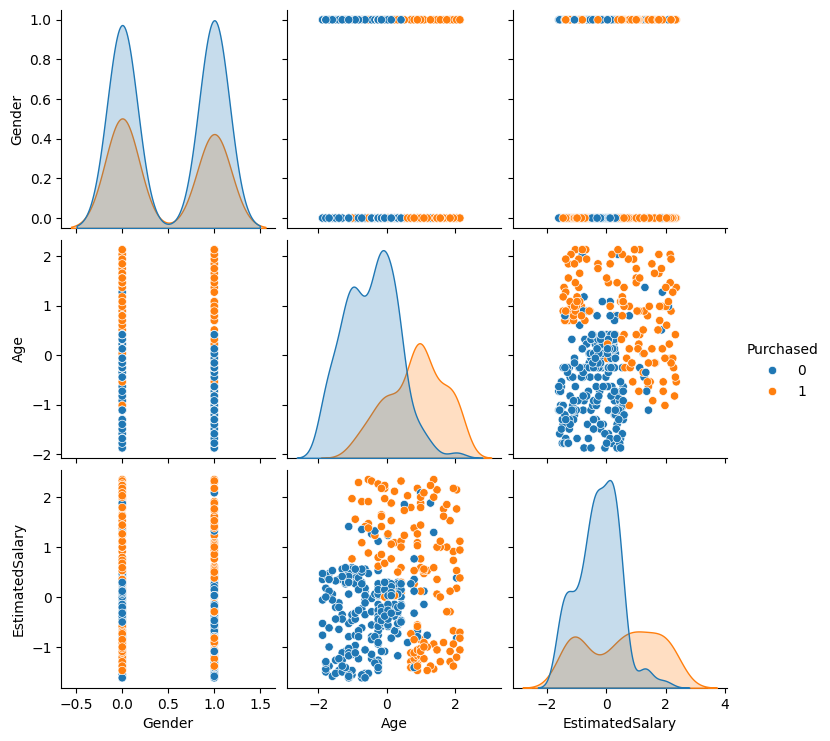

In [15]:
# Pairplot to show relationships between features
sns.pairplot(data, hue='Purchased')
plt.show()

aa

# Model Building With 3 features

In [83]:
# Split dataset
X = data[['Gender','Age', 'EstimatedSalary']]
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# Gaussian Naive Bayes

In [84]:
#Train Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)
Y_ModelNB = model.predict(X_test)
NB_accuracy = accuracy_score(y_test, Y_ModelNB)
Precision_NB = precision_score(y_test, Y_ModelNB, zero_division=0)
print("Naive Bayes Accuracy:", NB_accuracy)
print("Precision:",Precision_NB)

Naive Bayes Accuracy: 0.91
Precision: 0.9259259259259259


# K-Nearest Neighbors (test with k=3, 5, and 7)

In [85]:

# 2. K-Nearest Neighbors with k=3, 5, 7

for k in [3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    print(f"KNN (k={k}) Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN (k=3) Accuracy: 0.92
KNN (k=5) Accuracy: 0.93
KNN (k=7) Accuracy: 0.93


In [86]:
# k = 3
knn_3 = KNeighborsClassifier(3)
knn_3.fit(X_train, y_train)
y_pred_knn_3 = knn_3.predict(X_test)
knn_3_accuracy = accuracy_score(y_test, y_pred_knn_3)
Precision_KNN_3 = precision_score(y_test, y_pred_knn_3, zero_division=0)
print(f"KNN (3) Accuracy:",knn_3_accuracy)
print("Precision KNN 3:",Precision_KNN_3)
# k = 5
knn_5 = KNeighborsClassifier(5)
knn_5.fit(X_train, y_train)
y_pred_knn_5 = knn_5.predict(X_test)
knn_5_accuracy = accuracy_score(y_test, y_pred_knn_5)
Precision_KNN_5 = precision_score(y_test, y_pred_knn_5, zero_division=0)
print(f" Precision KNN (5):", Precision_KNN_5)
print(f"KNN (5) Accuracy:",knn_5_accuracy)

# k = 7
knn_7 = KNeighborsClassifier(7)
knn_7.fit(X_train, y_train)
y_pred_knn_7 = knn_7.predict(X_test)
knn_7_accuracy = accuracy_score(y_test, y_pred_knn_7)
Precision_KNN_7 = precision_score(y_test, y_pred_knn_7, zero_division=0)
print("Precision KNN 7:",Precision_KNN_7)
print(f"KNN (7) Accuracy:",knn_7_accuracy)

KNN (3) Accuracy: 0.92
Precision KNN 3: 0.875
 Precision KNN (5): 0.8787878787878788
KNN (5) Accuracy: 0.93
Precision KNN 7: 0.8787878787878788
KNN (7) Accuracy: 0.93


# Decision Tree

### Gini

In [91]:
# 3. Decision Tree with Gini
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
dt_gini_accuracy = accuracy_score(y_test, y_pred_gini)
print("Decision Tree (Gini) Accuracy:",dt_gini_accuracy)
Precision_Gini = precision_score(y_test, y_pred_gini, zero_division=0)
print(f"Precision of Gini : ", Precision_Gini)

Decision Tree (Gini) Accuracy: 0.9
Precision of Gini :  0.8235294117647058


### Entropy

In [92]:
# 4. Decision Tree with Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
dt_entropy_accuracy = accuracy_score(y_test, y_pred_entropy)
print("Decision Tree (Entropy) Accuracy:", dt_entropy_accuracy)
Precision_Entropy = precision_score(y_test, y_pred_entropy, zero_division=0)
print(f"Precision of Entropy : ", Precision_Entropy)

Decision Tree (Entropy) Accuracy: 0.91
Precision of Entropy :  0.8285714285714286


# Model Summary

In [93]:
summary = []

for model_name, y_pred in model_preds:
    summary.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# Display as DataFrame
results_df = pd.DataFrame(summary)
print(results_df.sort_values(by="F1 Score", ascending=False))

                     Model  Accuracy  Precision   Recall  F1 Score
1                KNN (k=3)      0.93   0.878788  0.90625  0.892308
2                KNN (k=5)      0.93   0.878788  0.90625  0.892308
3                KNN (k=7)      0.93   0.878788  0.90625  0.892308
5  Decision Tree (Entropy)      0.91   0.828571  0.90625  0.865672
4     Decision Tree (Gini)      0.90   0.823529  0.87500  0.848485
0              Naive Bayes      0.90   0.892857  0.78125  0.833333


# Model Building With 2 Features

In [89]:
# Split dataset
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# Gaussian Naive Bayes

In [90]:
#Train Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)
Y_ModelNB = model.predict(X_test)
NB_accuracy = accuracy_score(y_test, Y_ModelNB)
Precision_NB = precision_score(y_test, Y_ModelNB, zero_division=0)
print("Naive Bayes Accuracy:", NB_accuracy)

print("Precision:",Precision_NB)

Naive Bayes Accuracy: 0.9
Precision: 0.8928571428571429


# K-Nearest Neighbors (test with k=3, 5, and 7)

In [65]:

# 2. K-Nearest Neighbors with k=3, 5, 7

for k in [3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    print(f"KNN (k={k}) Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN (k=3) Accuracy: 0.93
KNN (k=5) Accuracy: 0.93
KNN (k=7) Accuracy: 0.93


In [66]:
# k = 3
knn_3 = KNeighborsClassifier(3)
knn_3.fit(X_train, y_train)
y_pred_knn_3 = knn_3.predict(X_test)
knn_3_accuracy = accuracy_score(y_test, y_pred_knn_3)
Precision_KNN_3 = precision_score(y_test, y_pred_knn_3, zero_division=0)
print(f"KNN (3) Accuracy:",knn_3_accuracy)
print("Precision KNN 3:",Precision_KNN_3)
# k = 5
knn_5 = KNeighborsClassifier(5)
knn_5.fit(X_train, y_train)
y_pred_knn_5 = knn_5.predict(X_test)
knn_5_accuracy = accuracy_score(y_test, y_pred_knn_5)
Precision_KNN_5 = precision_score(y_test, y_pred_knn_5, zero_division=0)
print(f" Precision KNN (5):", Precision_KNN_5)
print(f"KNN (5) Accuracy:",knn_5_accuracy)

# k = 7
knn_7 = KNeighborsClassifier(7)
knn_7.fit(X_train, y_train)
y_pred_knn_7 = knn_7.predict(X_test)
knn_7_accuracy = accuracy_score(y_test, y_pred_knn_7)
Precision_KNN_7 = precision_score(y_test, y_pred_knn_7, zero_division=0)
print("Precision KNN 7:",Precision_KNN_7)
print(f"KNN (7) Accuracy:",knn_7_accuracy)

KNN (3) Accuracy: 0.93
Precision KNN 3: 0.8787878787878788
 Precision KNN (5): 0.8787878787878788
KNN (5) Accuracy: 0.93
Precision KNN 7: 0.8787878787878788
KNN (7) Accuracy: 0.93


# Decision Tree

### Gini

In [67]:
# 3. Decision Tree with Gini
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
dt_gini_accuracy = accuracy_score(y_test, y_pred_gini)
print("Decision Tree (Gini) Accuracy:",dt_gini_accuracy)
Precision_Gini = precision_score(y_test, y_pred_gini, zero_division=0)
print(f"Precision of Gini : ", Precision_Gini)

Decision Tree (Gini) Accuracy: 0.9
Precision of Gini :  0.8235294117647058


### Entropy

In [68]:
# 4. Decision Tree with Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
dt_entropy_accuracy = accuracy_score(y_test, y_pred_entropy)
print("Decision Tree (Entropy) Accuracy:", dt_entropy_accuracy)
Precision_Entropy = precision_score(y_test, y_pred_entropy, zero_division=0)
print(f"Precision of Entropy : ", Precision_Entropy)

Decision Tree (Entropy) Accuracy: 0.91
Precision of Entropy :  0.8285714285714286


# Model Evaluation


Evaluate all models using:

■ Accuracy

■ Precision

■ Recall

■ F1-Score

■ Confusion Matrix


In [69]:
#accuracy
print("Naive Bayes Accuracy:", NB_accuracy)
print(f"KNN (3) Accuracy:",knn_3_accuracy)
print(f"KNN (5) Accuracy:",knn_5_accuracy)
print(f"KNN (7) Accuracy:",knn_7_accuracy)
print("Decision Tree (Gini) Accuracy:",dt_gini_accuracy)
print("Decision Tree (Entropy) Accuracy:", dt_entropy_accuracy)

Naive Bayes Accuracy: 0.9
KNN (3) Accuracy: 0.93
KNN (5) Accuracy: 0.93
KNN (7) Accuracy: 0.93
Decision Tree (Gini) Accuracy: 0.9
Decision Tree (Entropy) Accuracy: 0.91


In [70]:
#Precision
print("Naive Bayes Precision:", Precision_NB)
print(f"KNN (3) Precision:",Precision_KNN_3)
print(f"KNN (5) Precision:",Precision_KNN_5)
print(f"KNN (7) Precision:",Precision_KNN_7)
print("Decision Tree (Gini) Precision:",Precision_Gini)
print("Decision Tree (Entropy) Precision:", Precision_Entropy)

Naive Bayes Precision: 0.8928571428571429
KNN (3) Precision: 0.8787878787878788
KNN (5) Precision: 0.8787878787878788
KNN (7) Precision: 0.8787878787878788
Decision Tree (Gini) Precision: 0.8235294117647058
Decision Tree (Entropy) Precision: 0.8285714285714286


In [71]:
#Recall
# Classification Report
print("\n📋 Classification Report DT Gini:")
print(classification_report(y_test,y_pred_gini))
print("\n📋 Classification Report DT Entropy:")
print(classification_report(y_test,y_pred_entropy))
print("\n📋 Classification Report KNN 3:")
print(classification_report(y_test,y_pred_knn_3))
print("\n📋 Classification Report KNN 5:")
print(classification_report(y_test,y_pred_knn_5))
print("\n📋 Classification Report KNN 7:")
print(classification_report(y_test,y_pred_knn_7))
print("\n📋 Classification Report NB:")
print(classification_report(y_test,Y_ModelNB))


📋 Classification Report DT Gini:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        68
           1       0.82      0.88      0.85        32

    accuracy                           0.90       100
   macro avg       0.88      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100


📋 Classification Report DT Entropy:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100


📋 Classification Report KNN 3:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92  

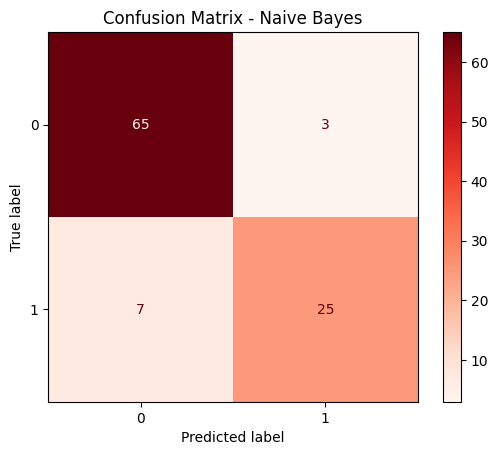

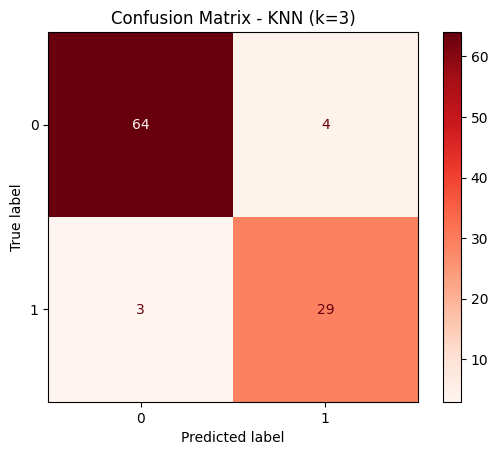

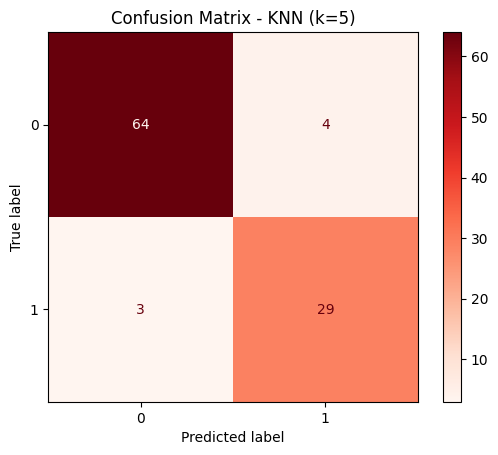

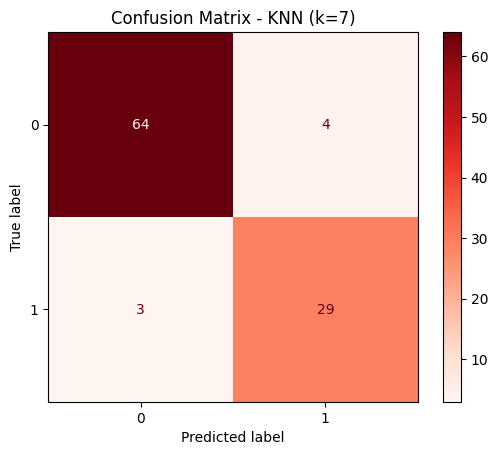

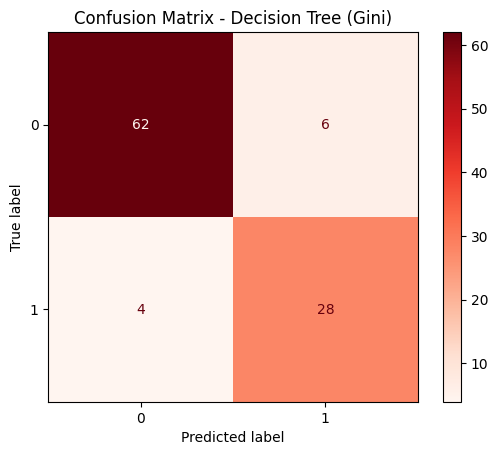

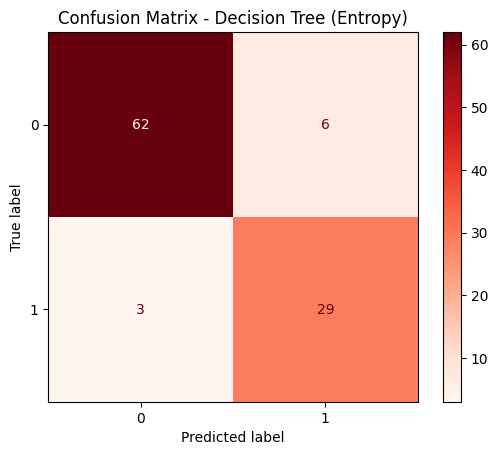

In [72]:
# List of model results and names
model_preds = [
    ("Naive Bayes", Y_ModelNB),
    ("KNN (k=3)", y_pred_knn_3),
    ("KNN (k=5)", y_pred_knn_5),
    ("KNN (k=7)", y_pred_knn_7),
    ("Decision Tree (Gini)", y_pred_gini),
    ("Decision Tree (Entropy)", y_pred_entropy),
]


for model_name, y_pred in model_preds:
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data['Purchased'].unique())
    disp.plot(cmap='Reds')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


In [73]:
summary = []

for model_name, y_pred in model_preds:
    summary.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# Display as DataFrame
results_df = pd.DataFrame(summary)
print(results_df.sort_values(by="F1 Score", ascending=False))


                     Model  Accuracy  Precision   Recall  F1 Score
1                KNN (k=3)      0.93   0.878788  0.90625  0.892308
2                KNN (k=5)      0.93   0.878788  0.90625  0.892308
3                KNN (k=7)      0.93   0.878788  0.90625  0.892308
5  Decision Tree (Entropy)      0.91   0.828571  0.90625  0.865672
4     Decision Tree (Gini)      0.90   0.823529  0.87500  0.848485
0              Naive Bayes      0.90   0.892857  0.78125  0.833333


In [74]:
# Model list

model_objects = [
    ("Naive Bayes",model, Y_ModelNB),
    ("KNN (k=3)", knn_3, y_pred_knn_3),
    ("KNN (k=5)", knn_5, y_pred_knn_5),
    ("KNN (k=7)", knn_7, y_pred_knn_7),
    ("Decision Tree (Gini)", dt_gini, y_pred_gini),
    ("Decision Tree (Entropy)", dt_entropy, y_pred_entropy),
]


In [75]:
def plot_decision_boundary_only(model, X_train, y_train, title="Decision Boundary"):
    # Assuming X_train is 2D feature array (numpy array)

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set2')

    # Plotting training points
    for label in np.unique(y_train):
        plt.scatter(X_train[y_train == label, 0],
                    X_train[y_train == label, 1],
                    label=f"Class {label}",
                    edgecolor='k', s=50)

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


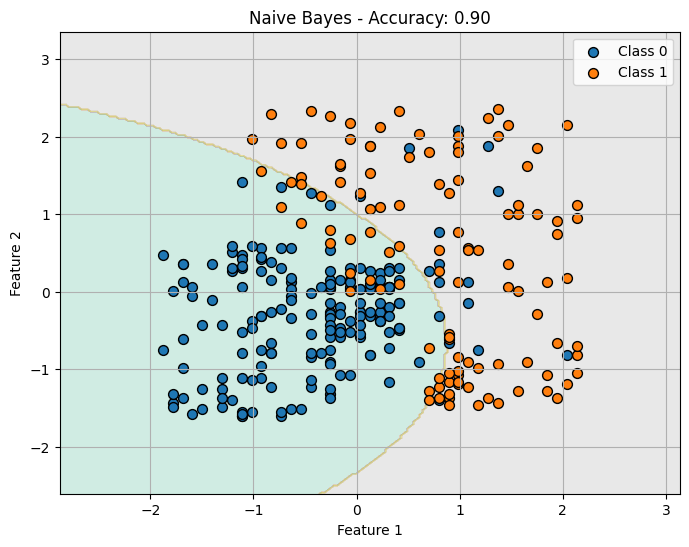

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


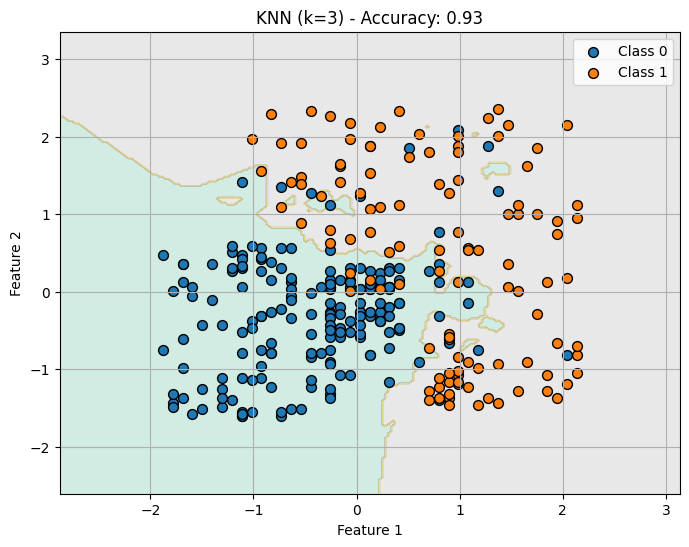

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


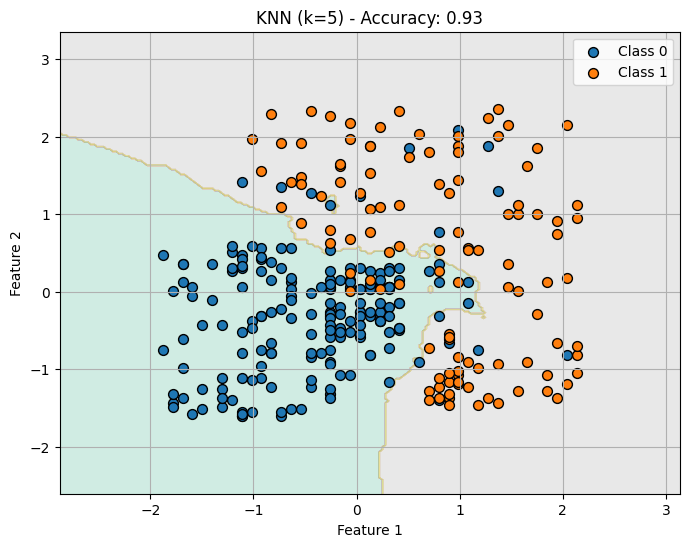

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


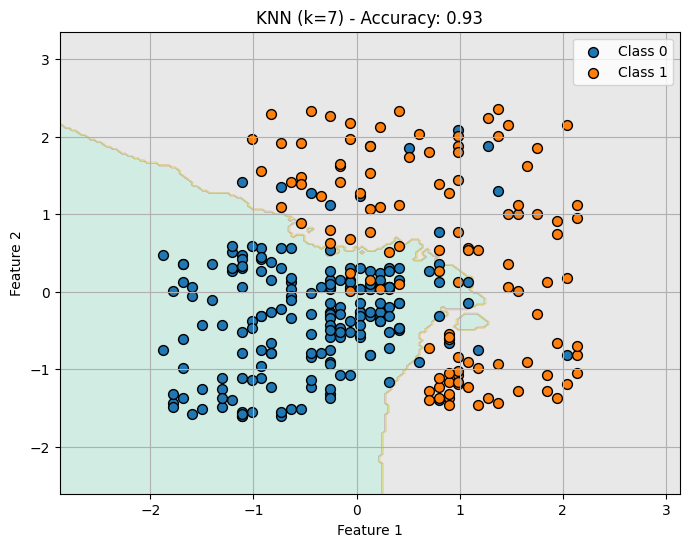

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


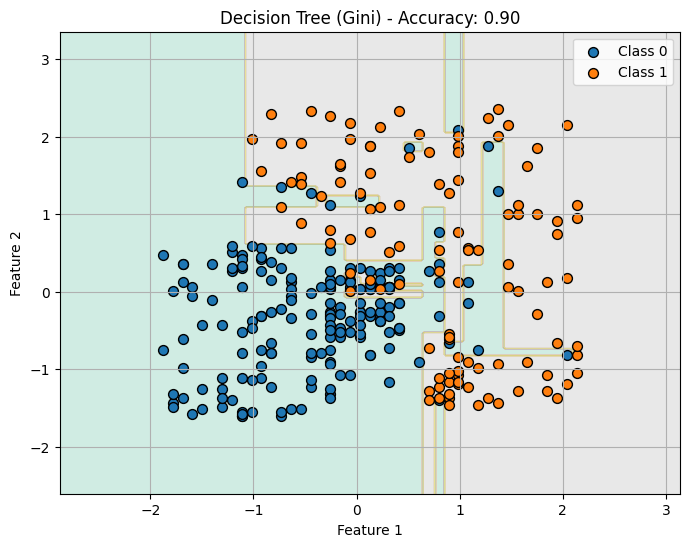

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


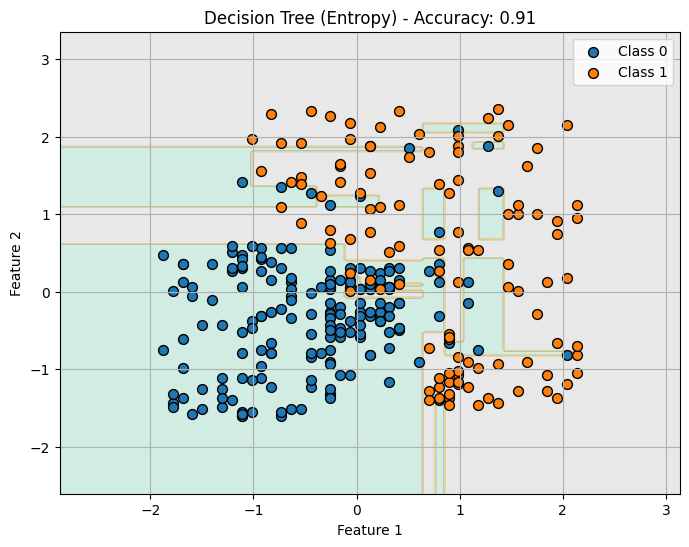

In [77]:
# Convert DataFrame to numpy arrays
X_train_np = X_train.values if hasattr(X_train, "values") else X_train
y_train_np = y_train.values if hasattr(y_train, "values") else y_train

for name, model, y_pred in model_objects:
    acc = accuracy_score(y_test, y_pred)
    title = f"{name} - Accuracy: {acc:.2f}"
    plot_decision_boundary_only(model, X_train_np, y_train_np, title=title)


### visualization

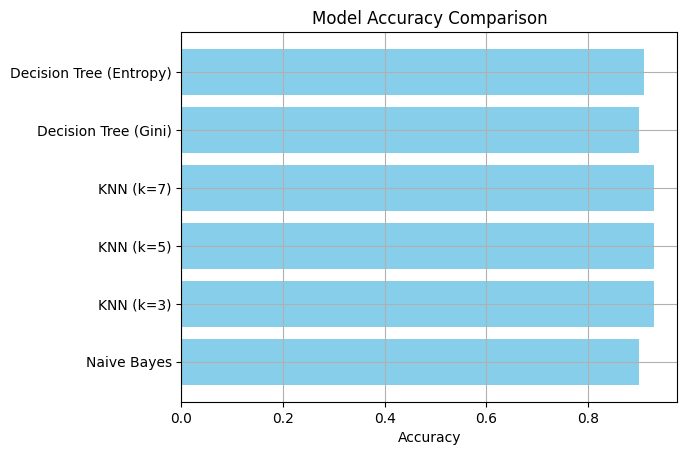

In [82]:
names = [name for name, _, _ in model_objects]
accuracies = [accuracy_score(y_test, y_pred) for _, _, y_pred in model_objects]

plt.barh(names, accuracies, color='skyblue')
plt.grid(True)
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


The comparison of model accuracies reveals that the K-Nearest Neighbors (KNN) classifiers, particularly with k = 7, achieved the highest accuracy among all evaluated models. All KNN variants (k = 3, 5, and 7) demonstrated consistently strong performance, slightly outperforming both the Decision Tree classifiers (using Gini index and Entropy criteria) and the Naive Bayes model. The superior performance of KNN (k = 7) suggests that considering a larger number of neighbors helped smooth out noise and improve classification stability, leading to better generalization. Decision Tree models also performed well, with the entropy-based tree slightly outperforming the Gini-based one.
In contrast, the Naive Bayes classifier showed comparatively lower accuracy, possibly due to its strong independence assumptions, which may not hold in the given dataset. Overall, the results indicate that KNN, particularly with an optimal value of k, is highly effective for this classification task.